# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E


Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
#Ordenamos y cogemos los 10 primeros valores (directo con top_n, pero no fui capaz de instalar la librería)
weatherPraga[order(weatherPraga$PRCP,na.last=TRUE,decreasing=TRUE),][1:10,c("DATE","PRCP")]

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

[1] "En media, la temperatura mínima ha aumentado cada año  0.0173750305134395  grados"


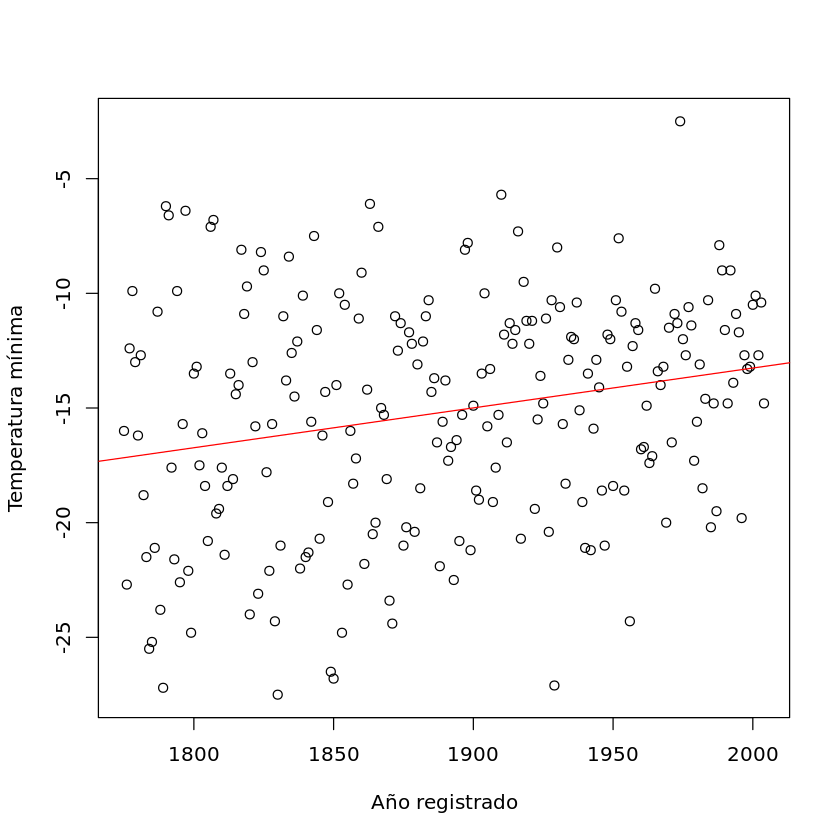

In [3]:
plot(weatherPraga$DATE,weatherPraga$EMNT,xlab="Año registrado",ylab="Temperatura mínima")
regresion_lineal<- lm(weatherPraga$EMNT~weatherPraga$DATE)
abline(regresion_lineal,col="red")
print(paste("En media, la temperatura mínima ha aumentado cada año ",regresion_lineal$coefficients[2]," grados"))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
media1<-mean(weatherPraga['1775'<=weatherPraga$DATE & weatherPraga$DATE<='1794',"EMNT"])
print(paste("La media de la temperatura mínima del intervalo de años [1775,1794] es: ",media1))
media2<-mean(weatherPraga['1985'<=weatherPraga$DATE & weatherPraga$DATE<='2004',"EMNT"])
print(paste("La media de la temperatura mínima del intervalo de años [1985,2004] es: ",media2))
print(paste("La diferencia de las medias de ambos intervalos es: ", media2-media1))


[1] "La media de la temperatura mínima del intervalo de años [1775,1794] es:  -16.935"
[1] "La media de la temperatura mínima del intervalo de años [1985,2004] es:  -13.04"
[1] "La diferencia de las medias de ambos intervalos es:  3.895"


In [5]:
#Para poder comprobar si las dos distribuciones tienen diferencias significativas hay que aplicar un test u otro en función de 
#si son distribuciones normales o no. Por tanto, comenzamos aplicando un test de normalidad:
shapiro.test(weatherPraga['1775'<=weatherPraga$DATE & weatherPraga$DATE<='1794',"EMNT"])
shapiro.test(weatherPraga['1985'<=weatherPraga$DATE & weatherPraga$DATE<='2004',"EMNT"])



	Shapiro-Wilk normality test

data:  weatherPraga["1775" <= weatherPraga$DATE & weatherPraga$DATE <=     "1794", "EMNT"]
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  weatherPraga["1985" <= weatherPraga$DATE & weatherPraga$DATE <=     "2004", "EMNT"]
W = 0.91373, p-value = 0.0751


In [6]:
#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a asumir normalidad
#Aplicamos, por tanto, el test de Welch:
t.test(weatherPraga['1775'<=weatherPraga$DATE & weatherPraga$DATE<='1794',"EMNT"],
       weatherPraga['1985'<=weatherPraga$DATE & weatherPraga$DATE<='2004',"EMNT"])


	Welch Two Sample t-test

data:  weatherPraga["1775" <= weatherPraga$DATE & weatherPraga$DATE <=  and weatherPraga["1985" <= weatherPraga$DATE & weatherPraga$DATE <=     "1794", "EMNT"] and     "2004", "EMNT"]
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


In [7]:
#Usando p-value = 0.05 como umbral para descartar la hipótesis nula, este test nos lleva a descartar la hipótesis nula
#Por tanto, podemos afirmar que las medias de las dos distribuciones son distintas
print(paste("La diferencia de ", media2-media1, "observada es estadísticamente significativa"))

[1] "La diferencia de  3.895 observada es estadísticamente significativa"


## Datos banco mundial

Carga los datos del banco mundial

In [8]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [9]:
#Merge de ambos DF, nos quedamos con los países. Después, cogemos el identificador de las emisiones de CO2, porque las 
#siguientes preguntas serán sobre este campo:
databank_country<-merge(databank,realCountryData, by="Country.Code", all=F)
CO2_emissions_country<-databank_country[databank_country$Indicator.Code=="EN.ATM.GHGT.KT.CE",]
head(CO2_emissions_country)



,Country.Code,Country.Name,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2014,2015,2016,2017,Var.63,Region,IncomeGroup,SpecialNotes,TableName,X
48,ABW,Aruba,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Aruba,NA
134,AFG,Afghanistan,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,South Asia,Low income,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.",Afghanistan,NA
227,AGO,Angola,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Sub-Saharan Africa,Lower middle income,,Angola,NA
250,ALB,Albania,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Europe & Central Asia,Upper middle income,,Albania,NA
385,AND,Andorra,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align with ISO code.,Andorra,NA
453,ARE,United Arab Emirates,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,Middle East & North Africa,High income,,United Arab Emirates,NA


In [10]:
#Buscamos el valor máximo:
print(paste("El país más contaminante en 1970 emitió",max(CO2_emissions_country$"1970", na.rm=T),"toneladas, y fue",
            CO2_emissions_country[which(CO2_emissions_country$"1970"==max(CO2_emissions_country$"1970", na.rm=T)),"Country.Name"]))

[1] "El país más contaminante en 1970 emitió 5400503.5 toneladas, y fue United States"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [11]:
CO2_emissions_country[order(CO2_emissions_country$"2012",na.last=TRUE,decreasing=TRUE),][1:5,c("Country.Name","2012")]


,Country.Name,2012
2905,China,12454711
16280,United States,6343841
7149,India,3002895
2098,Brazil,2989418
13246,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [12]:
#Seleccionamos las columnas que queremos, definimos la función de la media geométrica y calculamos:
China_emissions<-CO2_emissions_country[CO2_emissions_country$Country.Name=="China",c("Country.Name",as.character(2000:2012))]
ratio<-China_emissions[,2:ncol(China_emissions)]/China_emissions[,1:ncol(China_emissions)-1]
myGeometricMean<-function(X,na.rm=F){
    exp(mean(log(X),na.rm=na.rm))
}
media_geometrica<-(myGeometricMean(as.numeric(ratio[1,]),na.rm = T)-1)*100
print(paste("La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es:",media_geometrica,"%"))



Warning message in Ops.factor(left, right):
“‘/’ not meaningful for factors”

[1] "La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es: 7.75545448926402 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [13]:
#Creamos un DF con las filas y columnas que necesitamos
library(reshape2)
per_capita_emissions<-databank_country[databank_country$Indicator.Code=="EN.ATM.CO2E.PC",
                                       c("Country.Code","Country.Name","1960","1990","2012")]
per_capita_emissions<-melt(per_capita_emissions,id=c("Country.Code","Country.Name"))
head(per_capita_emissions)




Country.Code,Country.Name,variable,value
ABW,Aruba,1960,NA
AFG,Afghanistan,1960,0.0460599
AGO,Angola,1960,0.0974716
ALB,Albania,1960,1.2581949
AND,Andorra,1960,NA
ARE,United Arab Emirates,1960,0.1187577


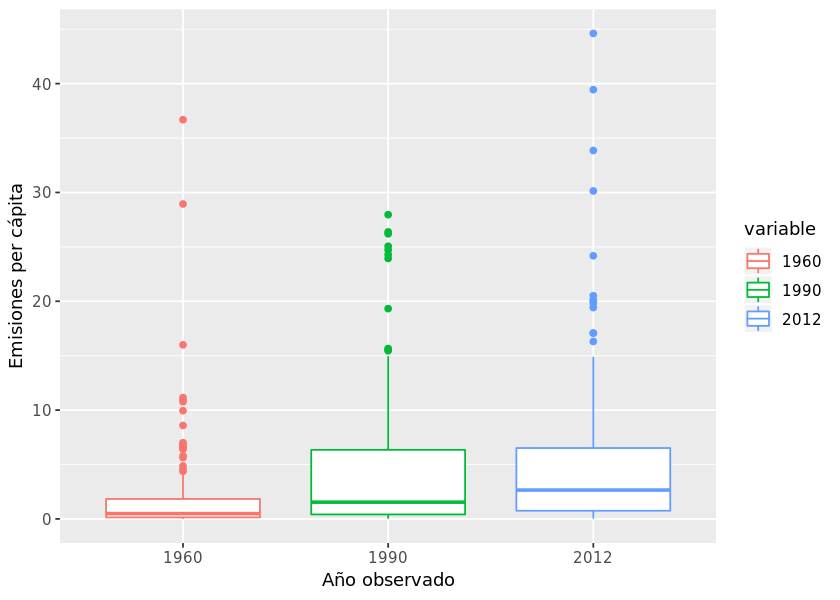

In [14]:
library("ggplot2")
options(repr.plot.height=5,repr.plot.width=7)
#diagrama de cajas
ggplot(data=per_capita_emissions,aes(x=variable, y=value,color=variable,na.rm=T))+geom_boxplot(na.rm=T)+
xlab("Año observado")+ylab("Emisiones per cápita")

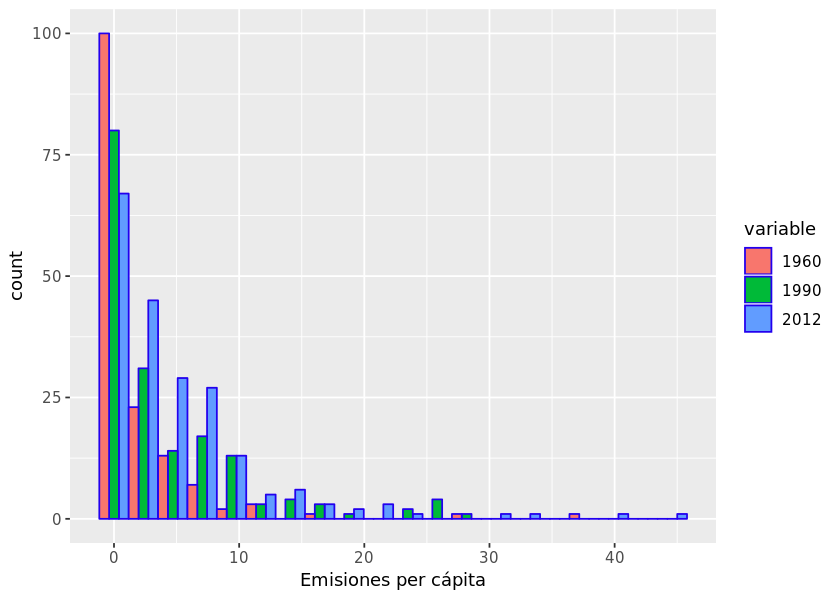

In [15]:
#histograma
ggplot(data=per_capita_emissions,aes(x=value,fill=variable,na.rm=T))+
geom_histogram(bins=20, color="#2200EE",position = "dodge",na.rm=T)+xlab("Emisiones per cápita")

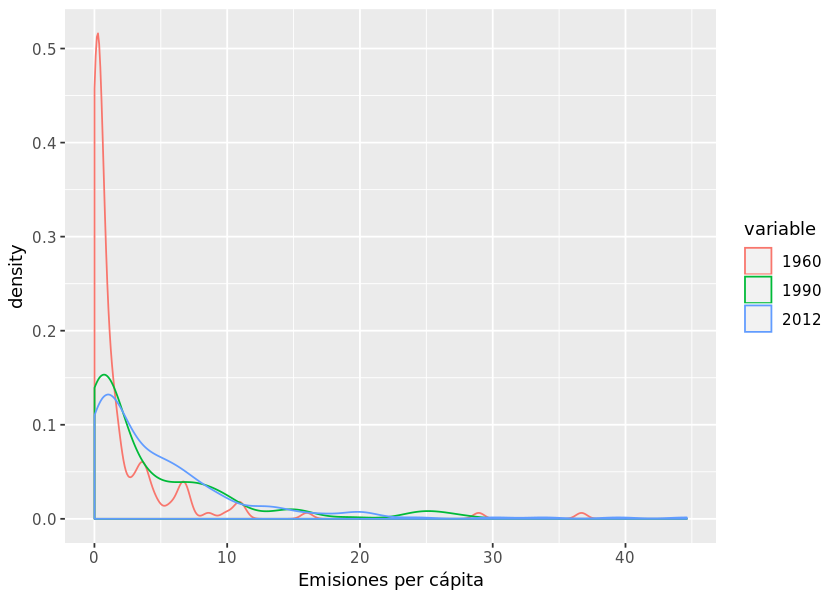

In [16]:
#curvas de densidad
ggplot(data=per_capita_emissions,aes(x=value,color=variable,na.rm=T))+
    geom_density(na.rm=T)+xlab("Emisiones per cápita")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [17]:
#Merge de ambos DF, nos quedamos con las regiones. Después, cogemos el identificador de las emisiones totales de CO2, porque las 
#siguientes preguntas serán sobre este campo. Además, cogemos las regiones que nos dicen:
databank_region<-merge(databank,regionData, by="Country.Code", all=F)
CO2_emissions_region<-databank_region[databank_region$Indicator.Code=="EN.ATM.CO2E.KT",]
CO2_emissions_region<-CO2_emissions_region[which(CO2_emissions_region$Country.Code%in%c("WLD","EUU","SSA","NAC","TEA")),]
head(CO2_emissions_region)


,Country.Code,Country.Name,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2014,2015,2016,2017,Var.63,Region,IncomeGroup,SpecialNotes,TableName,X
785,EUU,European Union,CO2 emissions (kt),EN.ATM.CO2E.KT,2359594.9,2445945.7,2587255.9,2763661.3,2879590.4,2977005.8,⋯,3241844.4,NA,NA,NA,NA,,,European Union aggregate.,European Union,NA
2285,NAC,North America,CO2 emissions (kt),EN.ATM.CO2E.KT,3083749.0,3074863.8,3194551.1,3330490.4,3493998.3,3643256.2,⋯,5792048.5,NA,NA,NA,NA,,,North America regional aggregate. There are no economies in North America classified as low or middle income.,North America,NA
2821,SSA,Sub-Saharan Africa (excluding high income),CO2 emissions (kt),EN.ATM.CO2E.KT,126081.5,131873.2,136498.0,143101.0,157076.8,174349.5,⋯,822325.7,NA,NA,NA,NA,,,Sub-Saharan Africa regional aggregate (does not include high-income economies).,Sub-Saharan Africa (excluding high income),NA
3050,TEA,East Asia & Pacific (IDA & IBRD countries),CO2 emissions (kt),EN.ATM.CO2E.KT,840235.7,613891.6,502163.8,499241.1,506014.7,550367.1,⋯,11648078.8,NA,NA,NA,NA,,,East Asia & Pacific (IDA & IBRD countries) aggregate.,East Asia & Pacific (IDA & IBRD),NA
3654,WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,9396705.8,9434402.6,9818839.9,10355747.3,10947007.1,11433442.0,⋯,36138285.0,NA,NA,NA,NA,,,World aggregate.,World,NA


Warning message:
“Removed 15 rows containing missing values (geom_point).”

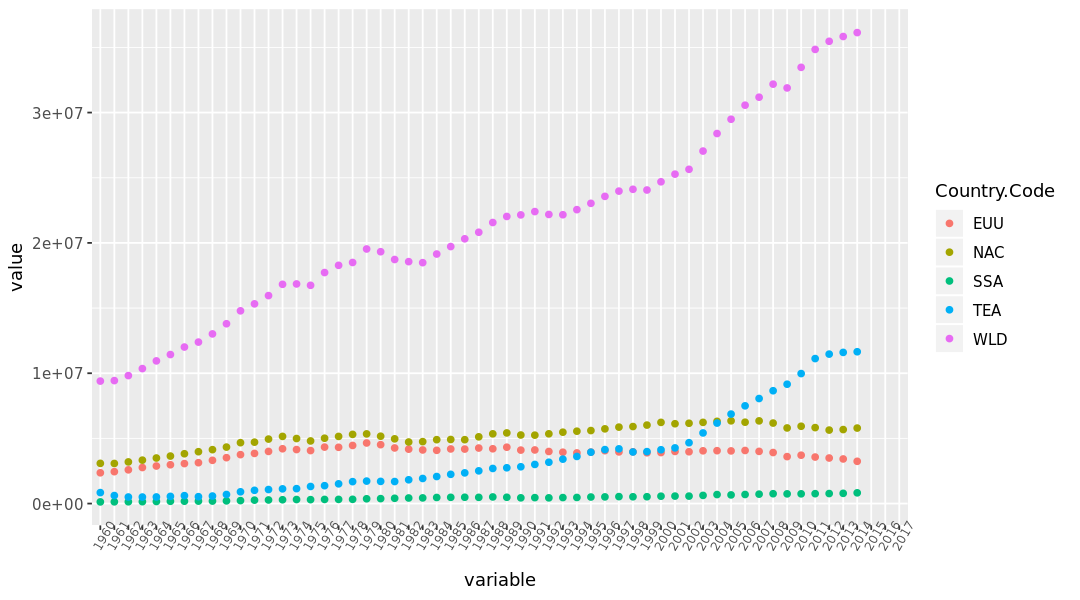

In [18]:
#Hacemos melt, como indica el enunciado, para tener los años en filas y pintamos:
CO2_emissions_region<-melt(CO2_emissions_region,id=c("Country.Code","Country.Name","Indicator.Name","Indicator.Code",
                                                              "Var.63","Region","IncomeGroup","SpecialNotes","TableName","X"))
options(repr.plot.height=5,repr.plot.width=9)
ggplot(data=CO2_emissions_region,aes(x=variable,y=value,color=Country.Code))+geom_point()+
theme(axis.text.x = element_text(angle=60,size=8))


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

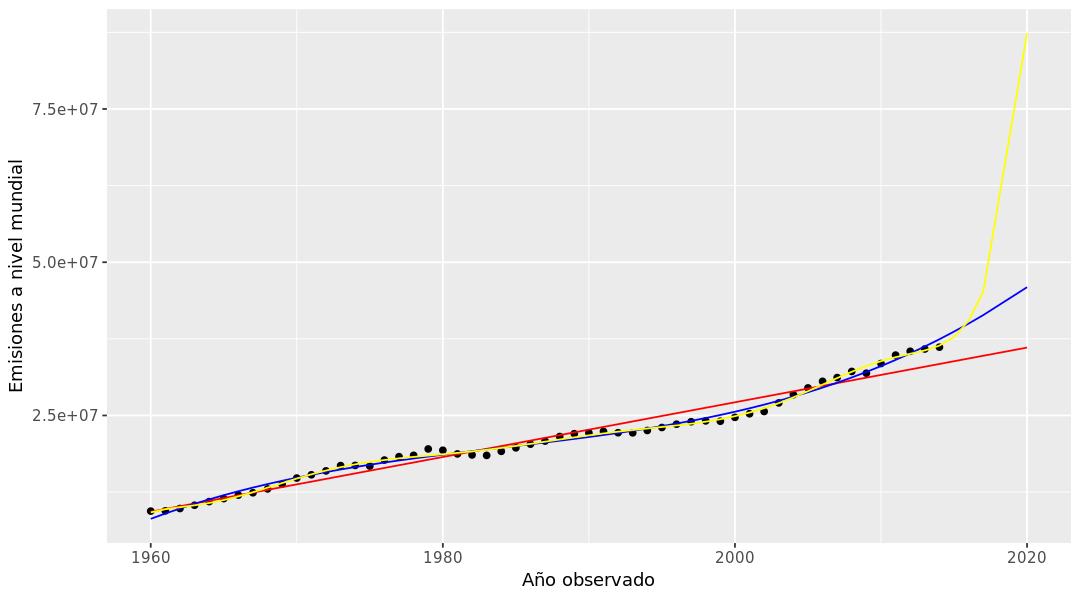

In [19]:
#WLD es el registro que trae el valor a nivel mundial, así que nos quedamos con ese registro:
CO2_emissions_world<-CO2_emissions_region[which(CO2_emissions_region$Country.Code=="WLD"),c("variable","value")]
#Casteamos a numérico para poder hacer las regresiones:
CO2_emissions_world$variable<-as.numeric(as.character(CO2_emissions_world$variable))
#Añadimos el valor 2020, para poder incluir el valor que saldrá de las regresiones, y pintarlo después
CO2_emissions_world<-rbind(CO2_emissions_world,list(2020,NA))
#Calculamos las distintas regresiones solicitadas:
CO2_emissions_world$regression1<-predict(lm(data=CO2_emissions_world, value~variable),CO2_emissions_world)
CO2_emissions_world$regression3<-predict(lm(data=CO2_emissions_world, value~poly(variable,3)),CO2_emissions_world)
CO2_emissions_world$regression10<-predict(lm(data=CO2_emissions_world, value~poly(variable,10)),CO2_emissions_world)

#Pintamos:
ggplot(data=CO2_emissions_world,aes(x=variable),na.rm=T)+geom_point(aes(y=value),na.rm=T)+
geom_line(aes(y=regression1),color="red",na.rm=T)+
geom_line(aes(y=regression3),color="blue",na.rm=T)+geom_line(aes(y=regression10),color="yellow",na.rm=T)+
xlab("Año observado") + ylab("Emisiones a nivel mundial")




## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [20]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))
head(co2ppm)

year,month,date,average,interpolated,trend,days
1958,4,1958.292,317.45,317.45,315.29,-1
1958,5,1958.375,317.50,317.50,314.71,-1
1958,6,1958.458,-99.99,317.10,314.85,-1
1958,7,1958.542,315.86,315.86,314.98,-1
1958,8,1958.625,314.93,314.93,315.94,-1
1958,9,1958.708,313.20,313.20,315.91,-1


Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [21]:
#Agregamos, como comenta el enunciado, los datos que tenemos en meses:
co2ppm_year<-aggregate(interpolated~year,data=co2ppm,mean)
head(co2ppm_year)


year,interpolated
1958,315.1889
1959,315.9742
1960,316.9075
1961,317.6375
1962,318.4508
1963,318.9942


In [22]:
#Usamos el dataset que creamos arriba para este ejercicio. Después, cogemos el identificador del CO2 medido en atmósfera,  
#porque las siguientes preguntas serán sobre este campo:
databank_region<-merge(databank,regionData, by="Country.Code", all=F)
CO2_emissions_NOAA<-databank_region[which(databank_region$Indicator.Code=="EN.ATM.CO2E.KT" & 
                                          databank_region$Country.Code=="WLD"),]

head(CO2_emissions_NOAA)

,Country.Code,Country.Name,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2014,2015,2016,2017,Var.63,Region,IncomeGroup,SpecialNotes,TableName,X
3654,WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,9396706,9434403,9818840,10355747,10947007,11433442,⋯,36138285,NA,NA,NA,NA,,,World aggregate.,World,NA


In [23]:
CO2_emissions_NOAA<-melt(CO2_emissions_NOAA,id=c("Country.Code","Country.Name","Indicator.Name","Indicator.Code",
                                                              "Var.63","Region","IncomeGroup","SpecialNotes","TableName","X"))
head(CO2_emissions_NOAA)

Country.Code,Country.Name,Indicator.Name,Indicator.Code,Var.63,Region,IncomeGroup,SpecialNotes,TableName,X,variable,value
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1960,9396706
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1961,9434403
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1962,9818840
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1963,10355747
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1964,10947007
WLD,World,CO2 emissions (kt),EN.ATM.CO2E.KT,NA,,,World aggregate.,World,NA,1965,11433442


In [24]:
#Hacemos merge de los datasets, nos quedamos con las columnas que necesitamos y eliminamos los NA
CO2_measurements<-merge(co2ppm_year,CO2_emissions_NOAA, by.x="year", by.y="variable", all=F)[,c("year","interpolated","value")]
CO2_measurements<-na.omit(CO2_measurements)
corr<-cor(CO2_measurements$"interpolated",CO2_measurements$"value")
print(paste("Hay una correlación entre el CO2 medido y el emitido de:",corr))
CO2_measurements_1<-melt(CO2_measurements,id="year")
head(CO2_measurements_1)



[1] "Hay una correlación entre el CO2 medido y el emitido de: 0.98455784385784"


year,variable,value
1960,interpolated,316.9075
1961,interpolated,317.6375
1962,interpolated,318.4508
1963,interpolated,318.9942
1964,interpolated,319.6175
1965,interpolated,320.0442


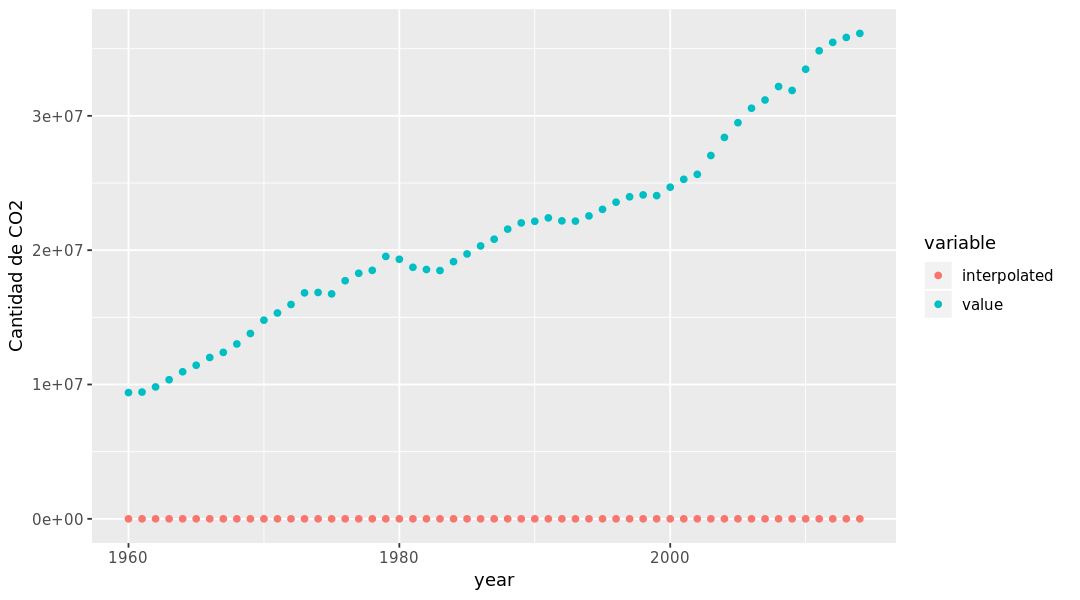

In [25]:
#Pintamos:
#Por el gráfico que sale, entiendo que las mediciones no están en la misma escala, pero no sé cuál es la escala correcta
ggplot(data=CO2_measurements_1,aes(x=year,y=value,color=variable))+geom_point()+
ylab("Cantidad de CO2")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [26]:
#Cambiamos los nombres de las columnas del de las emisiones de CO2 para que las etiquetas tengan algún sentido:
colnames(CO2_measurements)<-c("DATE","CO2 medido","CO2 emitido")
data<-merge(CO2_measurements,weatherPraga[,c("DATE","EMNT")], by="DATE", all=F)
cor(data[2:ncol(data)],use="complete.obs")

,CO2 medido,CO2 emitido,EMNT
CO2 medido,1.0000000,0.9703198,0.1783153
CO2 emitido,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000
